In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go

In [ ]:
INTRODUCTION TO THE DATA SET 

In [6]:
df = pd.read_csv("google_5yr_one.csv") #load dataset

In [7]:
df = df.drop(index=0).copy() #remove duplicates 

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 1 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1255 non-null   object
 2   High    1255 non-null   object
 3   Low     1255 non-null   object
 4   Open    1255 non-null   object
 5   Volume  1255 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


In [11]:
#convert numeric columns 
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
#convert 'Date' to datetime 
df['Date'] =pd.to_datetime(df['Date'], errors= 'coerce')

In [14]:
#drop missing values 
df.dropna(inplace=True)

In [15]:
#set 'date' as index 
df.set_index('Date',inplace=True)

In [16]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-06-04 to 2025-06-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Open    1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB
None
                Close       High        Low       Open    Volume
Date                                                            
2020-06-04  70.378517  71.723094  69.965992  71.497169  26982000
2020-06-05  71.658401  71.970910  70.046107  70.445200  42642000
2020-06-08  72.057487  72.105256  70.885091  70.974667  33878000
2020-06-09  72.258530  73.040793  71.774842  71.918162  33624000
2020-06-10  72.886528  73.288104  72.371990  72.727787  31762000


In [ ]:
EXPLORATORY DATA ANALYSIS (EDA)

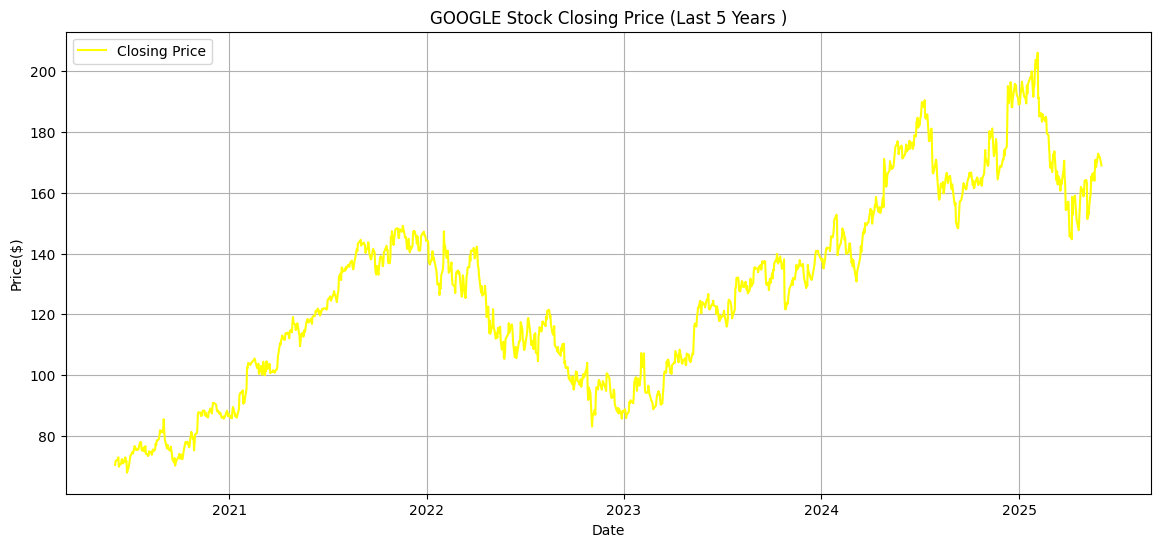

In [19]:
#Stock closing Price Over Time (line plot)
plt.figure(figsize=(14,6))
plt.plot(df['Close'],label='Closing Price',color='yellow')
plt.title('GOOGLE Stock Closing Price (Last 5 Years )')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.legend()
plt.grid(True)
plt.show()

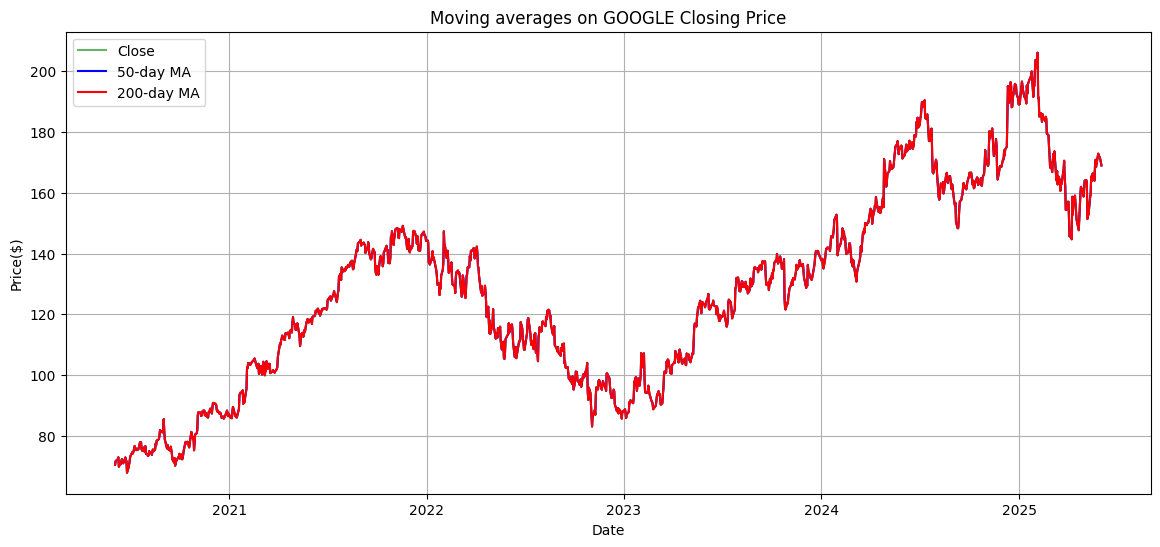

In [21]:
# Moving Averages (50-day and 200-day)
df['MA50']=df['Close'].rolling(window=50).mean()
df['MA200']=df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'],label='Close',color='green',alpha=0.60)
plt.plot(df['Close'],label='50-day MA',color='blue')
plt.plot(df['Close'],label='200-day MA',color='red')
plt.title('Moving averages on GOOGLE Closing Price')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.legend()
plt.grid(True)
plt.show()

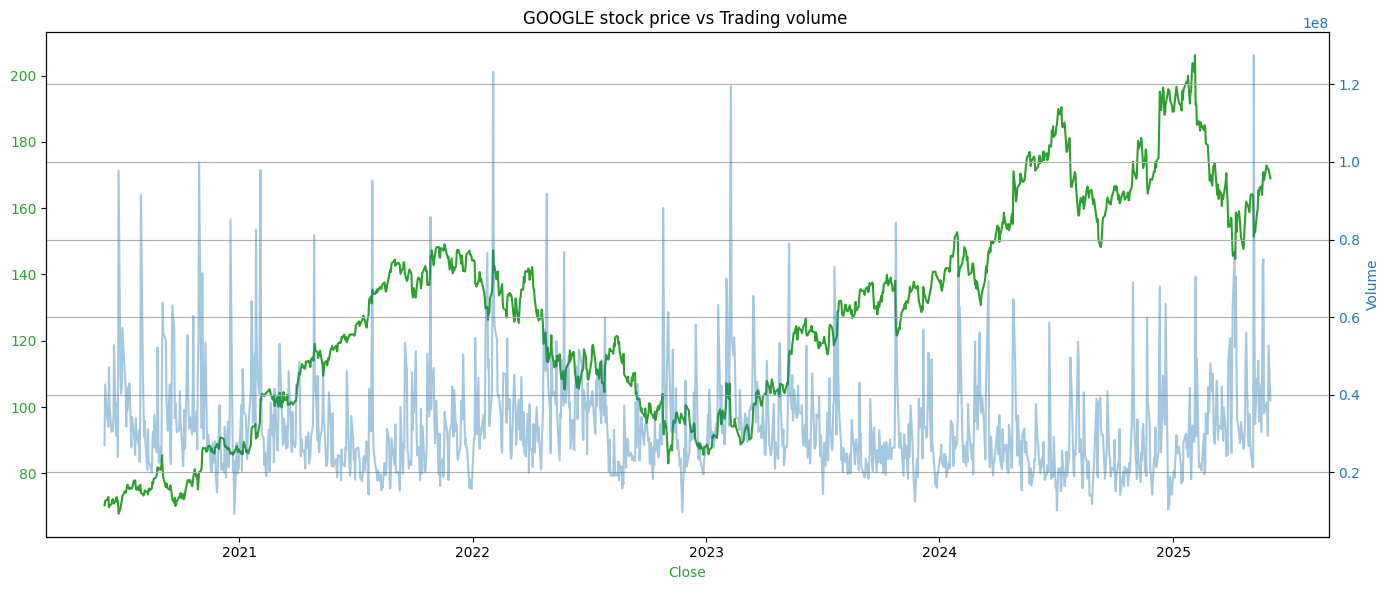

In [29]:
#Volume vs Closig price 

fig, ax1 = plt.subplots(figsize=(14,6))

color  = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_xlabel('Close',color=color)
ax1.plot(df.index,df['Close'],color=color, label='Close')
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df.index,df['Volume'],color=color,alpha=0.4, label='Volume',)
ax2.tick_params(axis='y',labelcolor=color)

plt.title('GOOGLE stock price vs Trading volume ')
fig.tight_layout()
plt.grid(True)
plt.show()

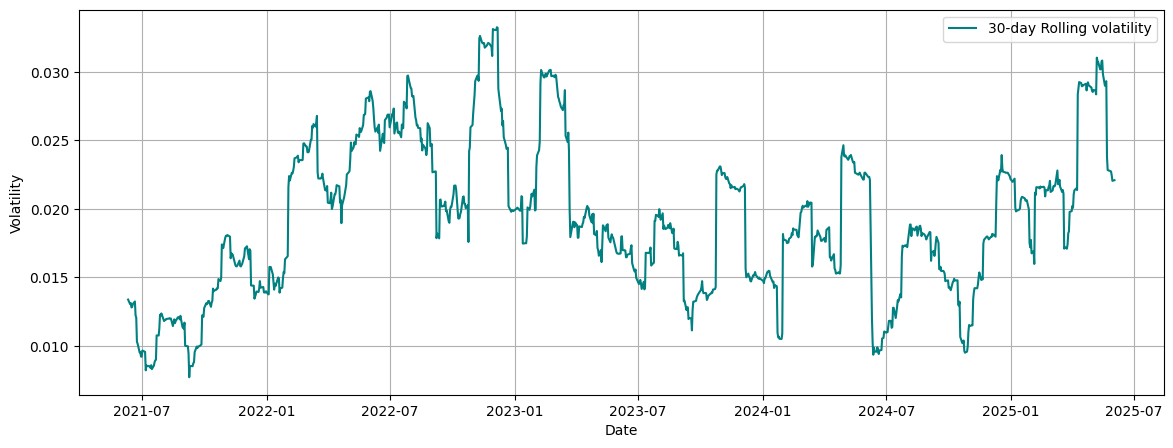

In [37]:
# Volatility
df['Daily return'] = df['Close'].pct_change()
df.dropna(inplace=True)

df['Volatility_30'] = df['Daily return'].rolling(window=30).std()

plt.figure(figsize=(14,5))
plt.plot(df['Volatility_30'], label='30-day Rolling volatility', color='teal')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()



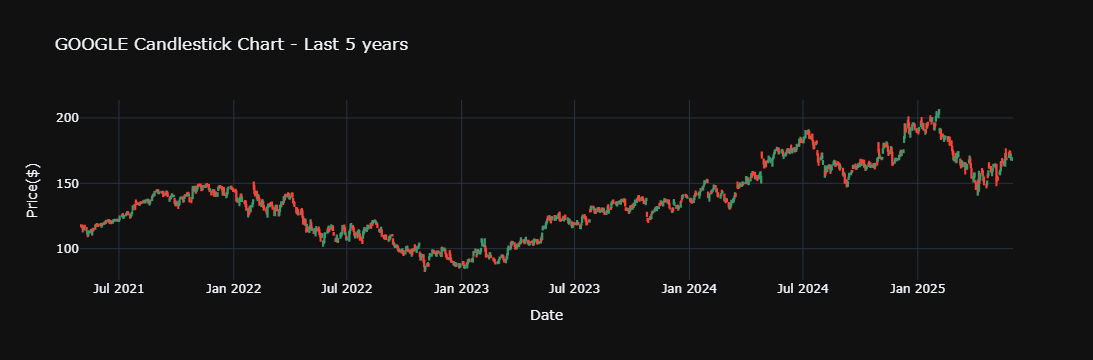

In [43]:
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name= 'GOOGLE Candelstick'
)])

fig.update_layout(
    title='GOOGLE Candlestick Chart - Last 5 years',
    xaxis_title='Date',
    yaxis_title='Price($)',
    xaxis_rangeslider_visible=False,
template='plotly_dark'
)

fig.show()


In [3]:
import pandas as pd

# Load data
df = pd.read_csv("google_5yr_one.csv", parse_dates=['Date'])
df = df.sort_values('Date')


print("Columns available in the DataFrame:")
print(df.columns)




try:
    eda_df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
except KeyError:
    print("\n'Adj Close' column not found. Attempting to export without it.")
    eda_df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
  


eda_df.to_csv("eda_output.csv", index=False)
print("\n'eda_output.csv' created successfully.")

KeyError: "['Adj Close'] not in index"